In [1]:
import sys
sys.path.insert(0, 'E:\Congcong\Documents\PythonCodes\MGB-A1-cNE-comparison')

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from plot_box import boxplot_scatter, plot_significance_star

In [108]:
datafolder = r'E:\Congcong\Documents\data\connection\data-summary'
stim = 'spon'
filename = f'ne-pairs-{stim}.json'
pairs = pd.read_json(os.path.join(datafolder, filename))
pairs = pairs[pairs[f'efficacy_neuron_{stim}'].notna() & pairs[f'efficacy_ne_{stim}'].notna() ]
pairs = pairs[pairs[f'inclusion_{stim}']]

In [109]:
pairs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 211
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ccg_neuron_spon           80 non-null     object 
 1   ccg_filtered_neuron_spon  80 non-null     object 
 2   baseline_neuron_spon      80 non-null     object 
 3   thresh_neuron_spon        80 non-null     object 
 4   sig_neuron_spon           80 non-null     bool   
 5   hw_neuron_spon            72 non-null     float64
 6   nspk_neuron_spon          80 non-null     int64  
 7   taxis                     80 non-null     object 
 8   ccg_ne_spon               80 non-null     object 
 9   ccg_filtered_ne_spon      80 non-null     object 
 10  baseline_ne_spon          80 non-null     object 
 11  thresh_ne_spon            80 non-null     object 
 12  sig_ne_spon               80 non-null     bool   
 13  hw_ne_spon                16 non-null     float64
 14  nspk_ne_spo

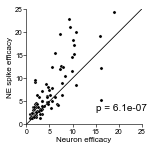

In [110]:
fig = plt.figure(figsize=[2, 2])
ax = fig.add_axes([.1, .1, .8, .8])
sns.scatterplot(data=pairs, x=f'efficacy_neuron_{stim}', y=f'efficacy_ne_{stim}', s=10, ax=ax, color='k')
_, p = stats.wilcoxon(pairs[f'efficacy_neuron_{stim}'], pairs[f'efficacy_ne_{stim}'])
ax.plot([0, 25], [0, 25], color='k')
ax.set_xlim([0, 25])
ax.set_ylim([0, 25])
ax.set_xlabel('Neuron efficacy')
ax.set_ylabel('NE spike efficacy')
ax.set_xticks(range(0, 26, 5), range(0, 26, 5))
ax.set_yticks(range(0, 26, 5), range(0, 26, 5))
ax.text(15, 3, 'p = {:.1e}'.format(p), fontsize=10)
fig.savefig(r'E:\Congcong\Documents\data\connection\figure\summary\efficacy_ne_vs_neuron_{}.jpg'.format(stim),
            dpi=300, bbox_inches='tight')


In [111]:
for unit in ('neuron', 'ne'):
    pairs[f'efficacy_scaled_{unit}_{stim}'] = (pairs[f'efficacy_{unit}_{stim}'] / 
                                               (pairs[f'baseline_{unit}_{stim}'].apply(max)/ pairs[f'nspk_{unit}_{stim}'] * 2000))

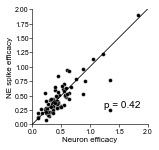

In [112]:
fig = plt.figure(figsize=[2, 2])
ax = fig.add_axes([.1, .1, .8, .8])
sns.scatterplot(data=pairs, x=f'efficacy_scaled_neuron_{stim}', y=f'efficacy_scaled_ne_{stim}', s=15, ax=ax, color='k')
_, p = stats.wilcoxon(pairs[f'efficacy_scaled_neuron_{stim}'], pairs[f'efficacy_scaled_ne_{stim}'])
ax.plot([0, 10], [0, 10], 'k')
ax.set_xlabel('Neuron efficacy')
ax.set_ylabel('NE spike efficacy')
ax.text(1.25, .3, 'p = {:.2f}'.format(p), fontsize=10)
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
fig.savefig(r'E:\Congcong\Documents\data\connection\figure\summary\efficacy_ne_vs_neuron_{}-scaled.jpg'.format(stim),
            dpi=300, bbox_inches='tight')

In [113]:
pairs[f'efficacy_gain_{stim}'] = pairs[f'efficacy_ne_{stim}'] / pairs[f'efficacy_neuron_{stim}']

In [114]:
pairs['target_ns'] = pairs['target_waveform_tpd'] < .45

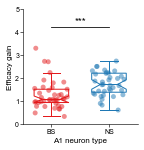

In [115]:
colors = sns.color_palette("Paired")
tpd_color = (colors[1], colors[5], colors[0], colors[4])
fig = plt.figure(figsize=[2, 2])
ax = fig.add_axes([.1, .1, .8, .8])
boxplot_scatter(ax=ax, data=pairs, x='target_ns', y=f'efficacy_gain_{stim}', hue='target_ns', jitter=.3, size=5,
                order=[False, True],hue_order=[False, True], palette=[tpd_color[1], tpd_color[0]])
ax.set_xticklabels(['BS', 'NS'])
ax.set_xlabel('A1 neuron type')
ax.set_ylabel('Efficacy gain')
ax.set_ylim([0, 5])
_, p = stats.mannwhitneyu(pairs[pairs.target_ns][f'efficacy_gain_{stim}'], pairs[~pairs.target_ns][f'efficacy_gain_{stim}'])
plot_significance_star(ax, p, [0, 1], 4.2, 4.5)
plt.savefig(r'E:\Congcong\Documents\data\connection\figure\summary\efficacy_gain_bs_vs_ns_{}.jpg'.format(stim),
            dpi=300, bbox_inches='tight')
